# California Housing Price Prediction
In this project, I aim to **predict California housing prices** using different regression models.  

## Exploratory Data Analysis (EDA):
   - Load and explore the dataset.  
   - Identify missing values and handle them.  
   - Explore distributions, correlations

In [380]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [381]:
housing = pd.read_csv("housing.csv")

In [382]:
housing.shape

(20640, 10)

In [383]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [384]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [385]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Check missing values

In [386]:
print(housing.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [387]:
print(housing.isnull().mean() * 100)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


<Axes: >

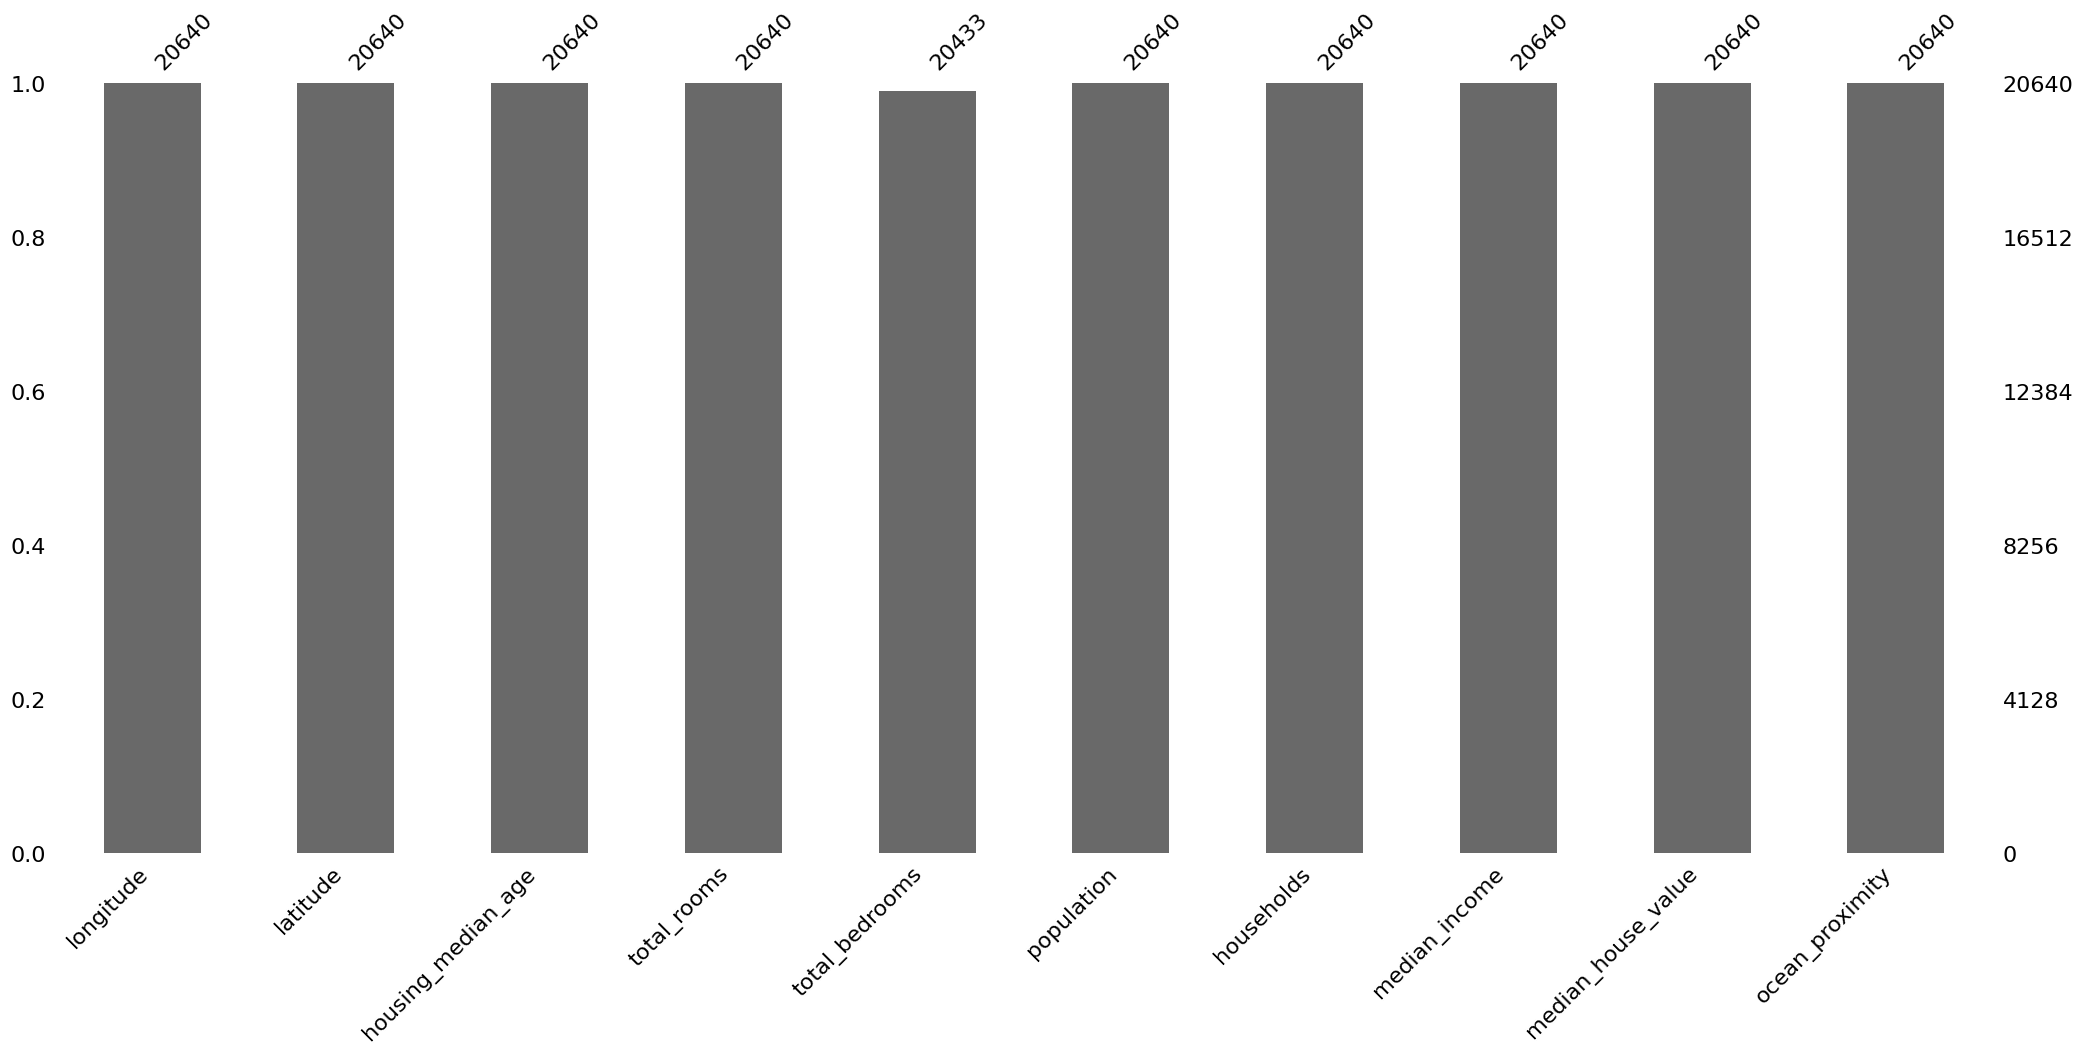

In [388]:
import missingno as msno
msno.bar(housing)

<Axes: >

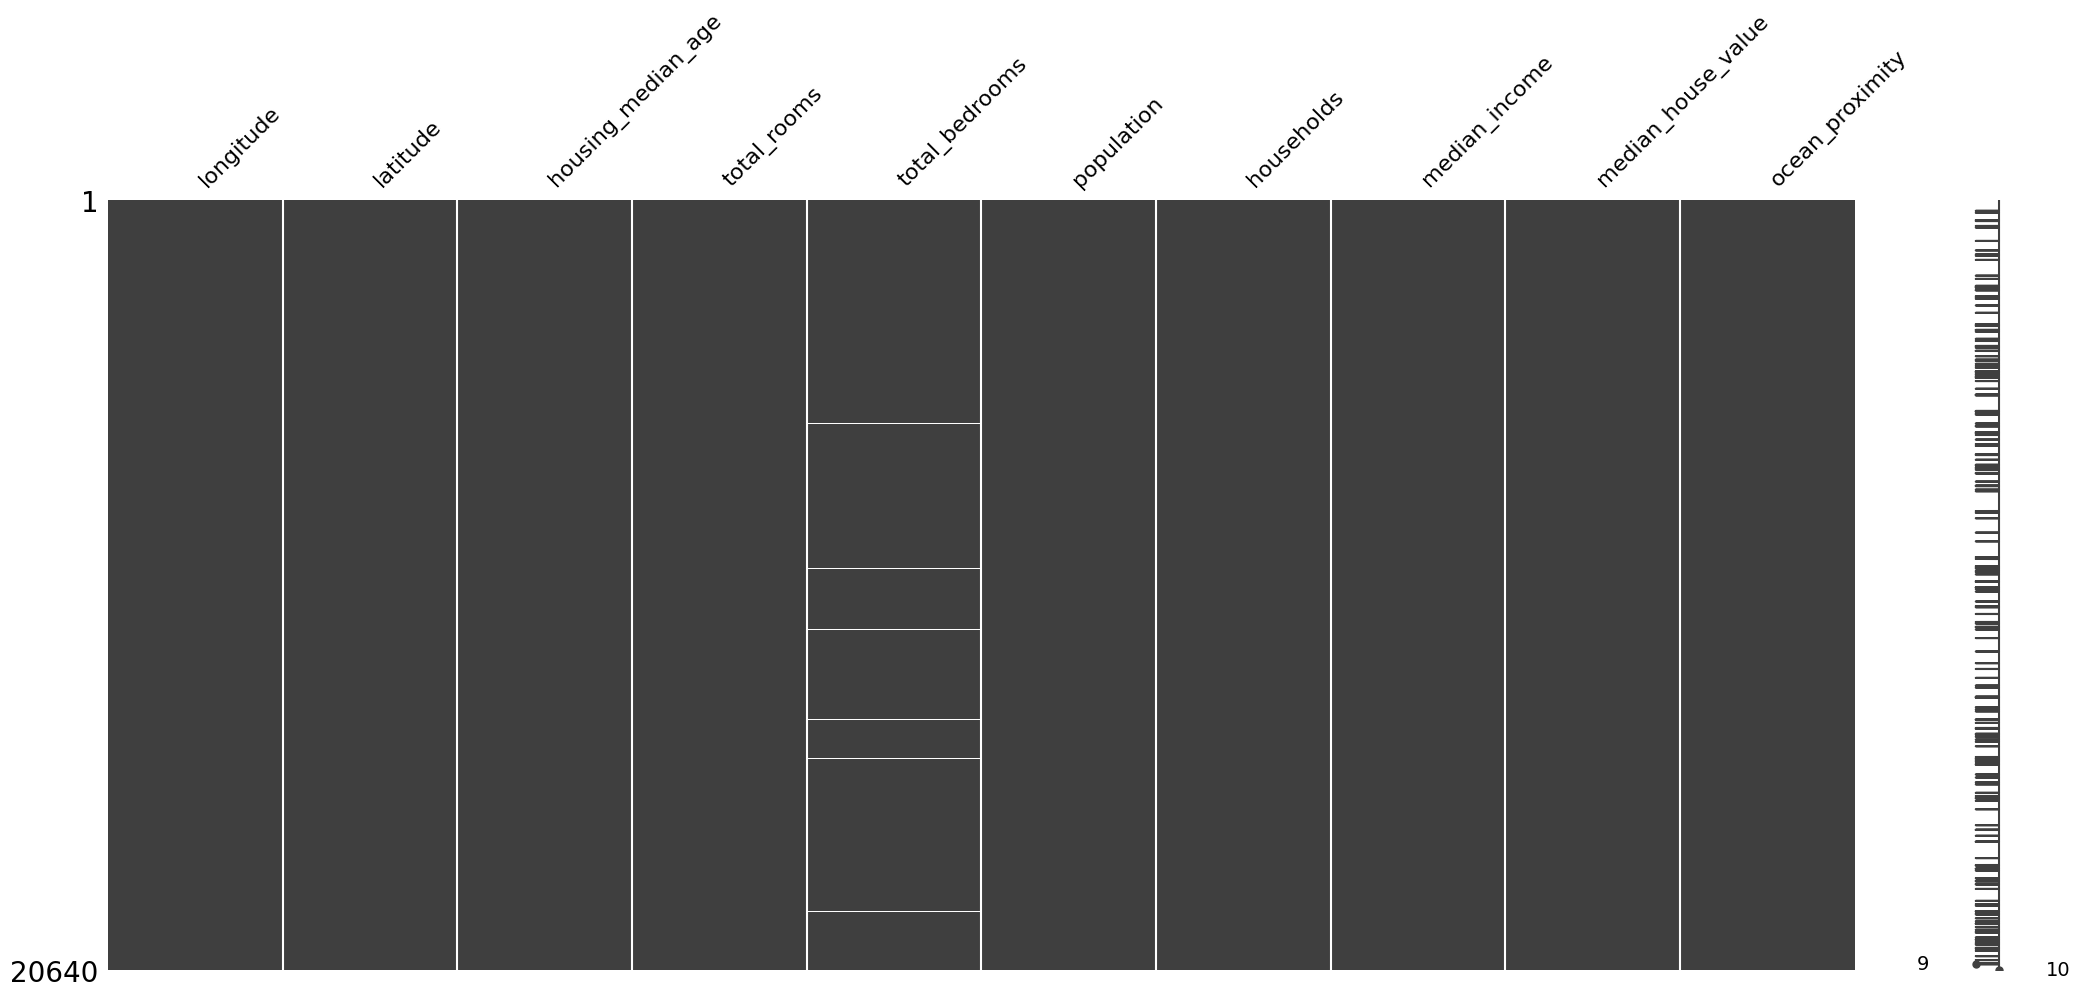

In [389]:
msno.matrix(housing)

## Data Cleaning & Feature Engineering
- Handle missing values by dropping or imputing.
- Remove duplicates if any.
- Encode categorical features (`ocean_proximity`) using one-hot encoding.
- Apply log transformations to skewed numeric columns (`total_rooms`, `total_bedrooms`, `population`, `households`).
- Create new features to capture relationships:
  - `bedroom_ratio` = total_bedrooms / total_rooms  
  - `households_rooms` = total_rooms / households  
  - `rooms_per_person` = total_rooms / population  
  - `income_per_room` = median_income / total_rooms  
  - `population_per_household` = population / households  


In [390]:
housing = housing.dropna()

In [391]:
print(housing.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [392]:
print("The number of duplicated Rows: ",housing.duplicated().sum())

The number of duplicated Rows:  0


### Split Dataset
- Split data into training and testing sets`(80%-20%)`
- Training set will be used for model training, test set for evaluation.

In [393]:
from sklearn.model_selection import train_test_split 
X = housing.drop('median_house_value',axis= 1)
y = housing['median_house_value']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state= 42 )

In [394]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


### Check feature distributions and skewness.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

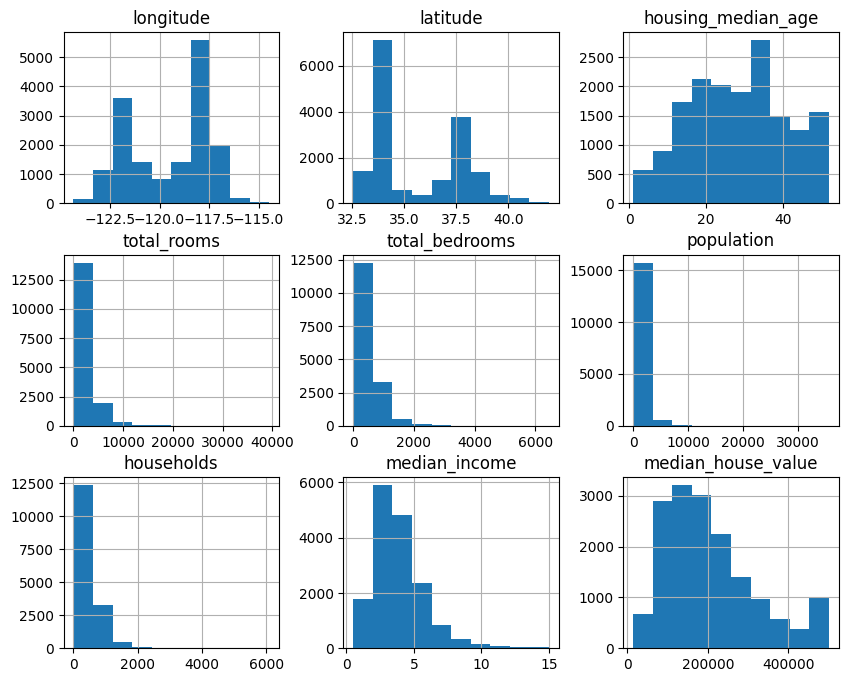

In [395]:
train_data.hist( figsize=(10,8))

In [396]:
corr_matrix = train_data.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924340,-0.106111,0.040173,0.066871,0.094641,0.054023,-0.021911,-0.048166
latitude,-0.924340,1.000000,0.009535,-0.033439,-0.066337,-0.106192,-0.071678,-0.073213,-0.141933
housing_median_age,-0.106111,0.009535,1.000000,-0.359714,-0.319073,-0.291689,-0.301818,-0.120550,0.104041
total_rooms,0.040173,-0.033439,-0.359714,1.000000,0.929102,0.851704,0.916829,0.202131,0.136040
total_bedrooms,0.066871,-0.066337,-0.319073,0.929102,1.000000,0.872241,0.978582,-0.005364,0.051352
population,0.094641,-0.106192,-0.291689,0.851704,0.872241,1.000000,0.903093,0.007224,-0.023989
households,0.054023,-0.071678,-0.301818,0.916829,0.978582,0.903093,1.000000,0.016608,0.066598
median_income,-0.021911,-0.073213,-0.120550,0.202131,-0.005364,0.007224,0.016608,1.000000,0.688695
median_house_value,-0.048166,-0.141933,0.104041,0.136040,0.051352,-0.023989,0.066598,0.688695,1.000000


In [397]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688695
total_rooms           0.136040
housing_median_age    0.104041
households            0.066598
total_bedrooms        0.051352
population           -0.023989
longitude            -0.048166
latitude             -0.141933
Name: median_house_value, dtype: float64

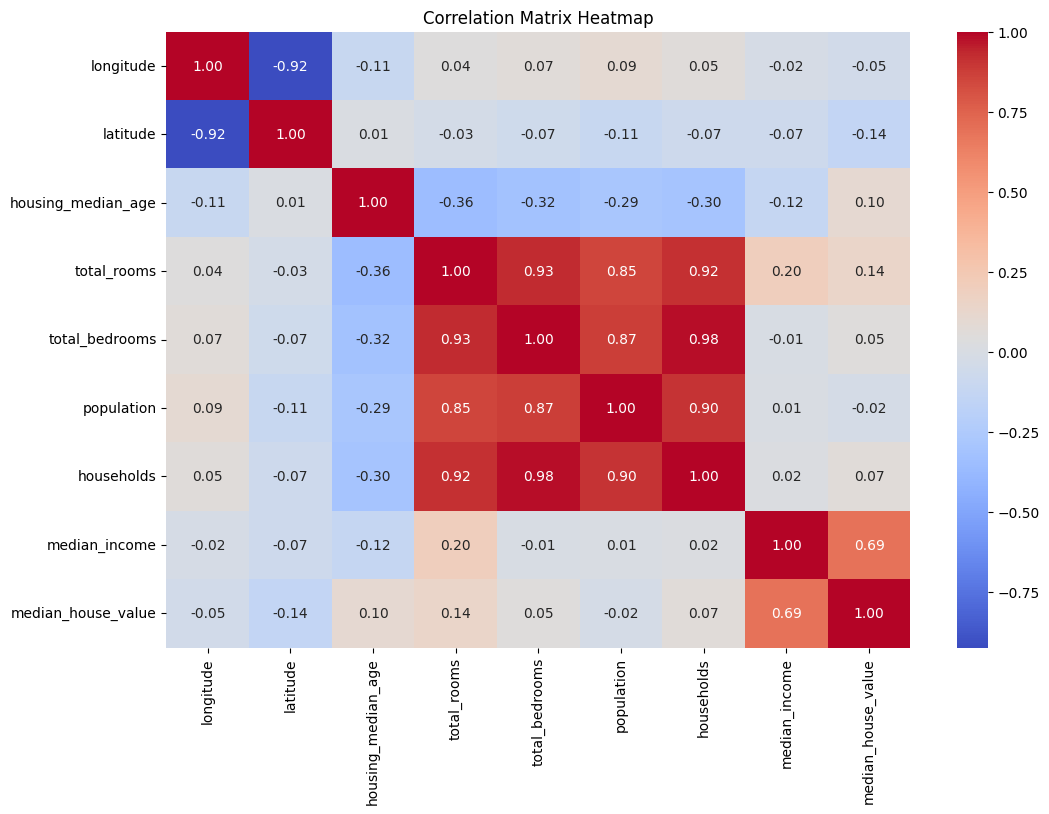

In [398]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

### Visualize location vs prices:

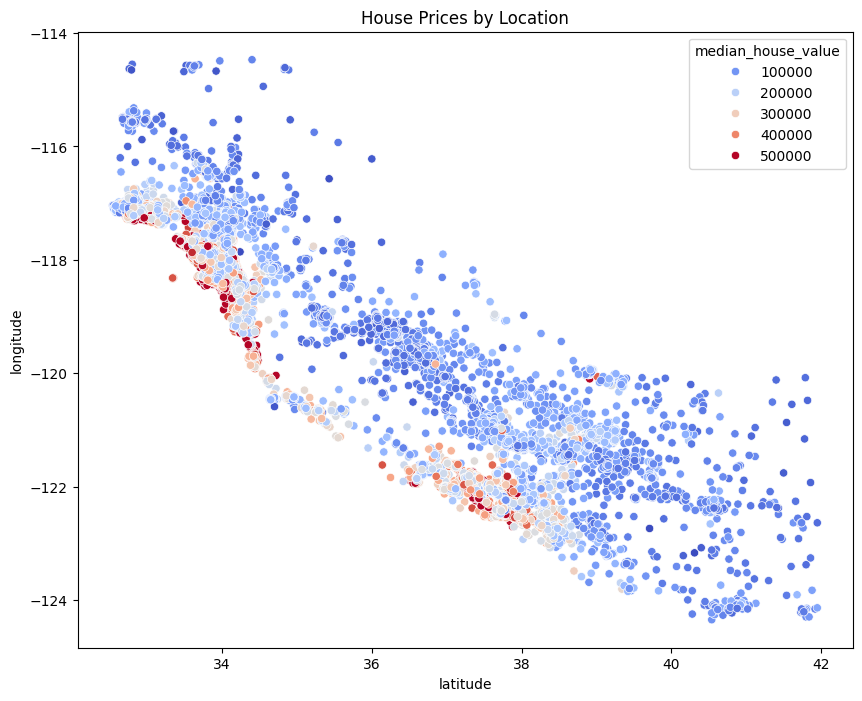

In [399]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')
plt.title("House Prices by Location")
plt.show()

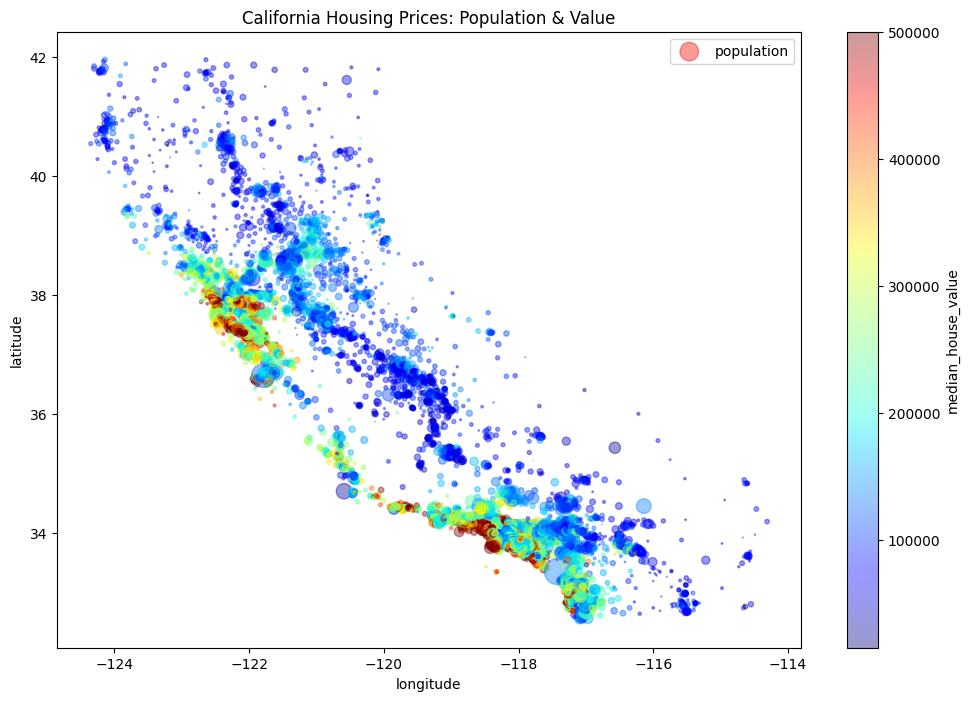

In [400]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             figsize=(12,8))
plt.legend()
plt.title("California Housing Prices: Population & Value")
plt.show()

### Log transformation


In [401]:
for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    train_data[col] = np.log(train_data[col] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

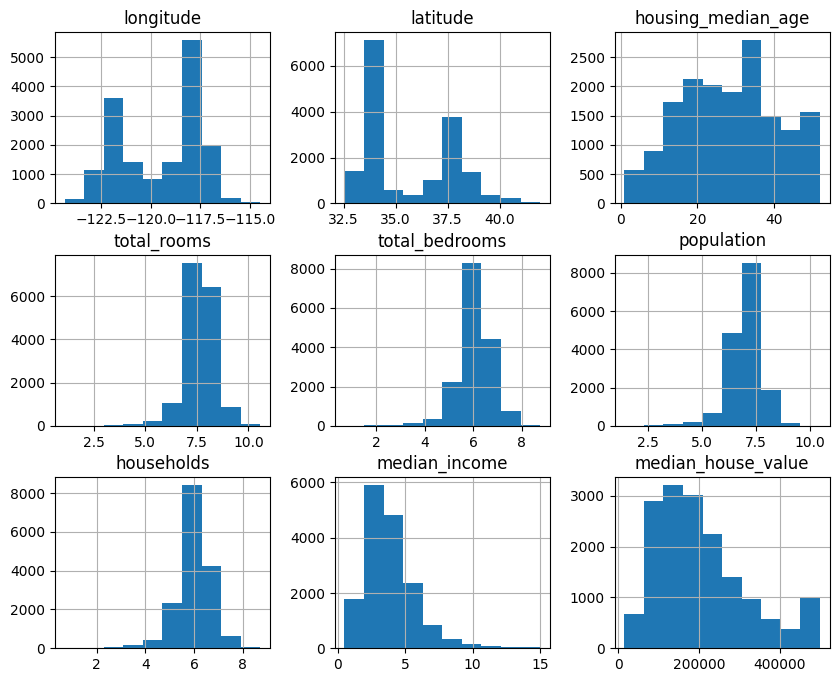

In [402]:
train_data.hist( figsize=(10,8))

In [403]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

### One-hot encoding for categorical feature


In [404]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop('ocean_proximity', axis=1)

In [405]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,1,0,0,0,0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,0,1,0,0,0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,0,1,0,0,0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,1,0,0,0,0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0


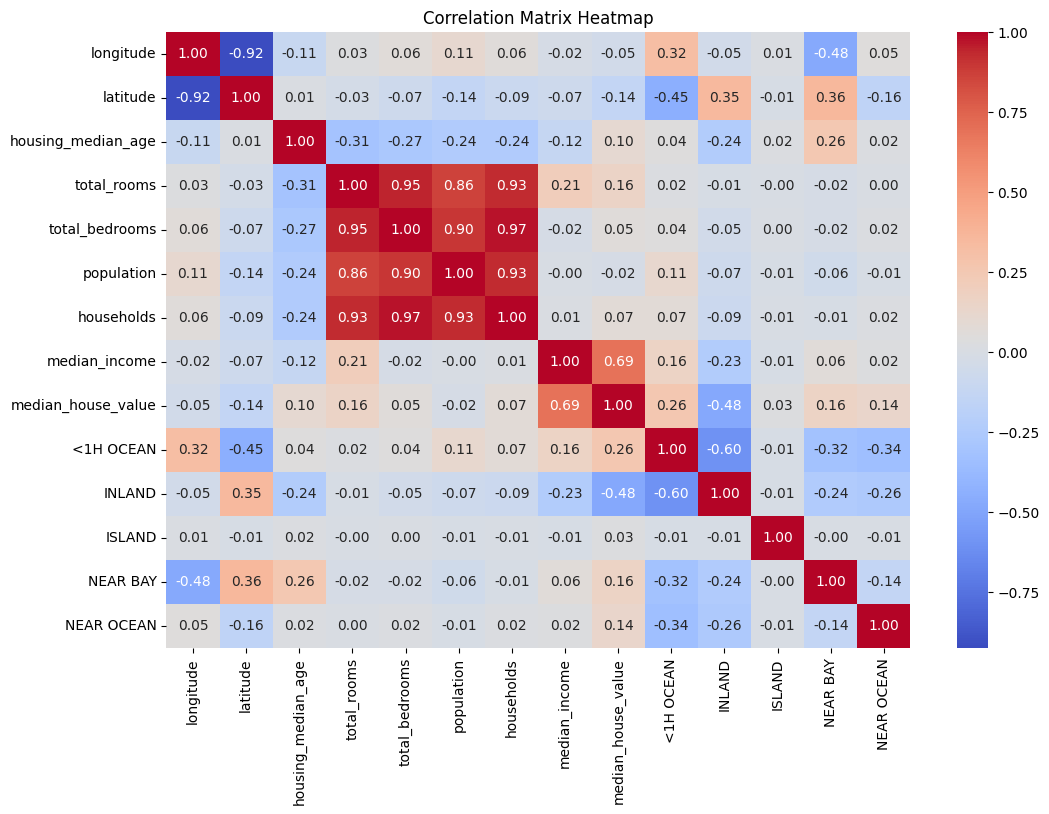

In [406]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

### Feature engineering


In [407]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms'] / train_data['households']
train_data['rooms_per_person'] = train_data['total_rooms'] / train_data['population']
train_data['income_per_room'] = train_data['median_income'] / train_data['total_rooms']
train_data['population_per_household'] = train_data['population'] / train_data['households']


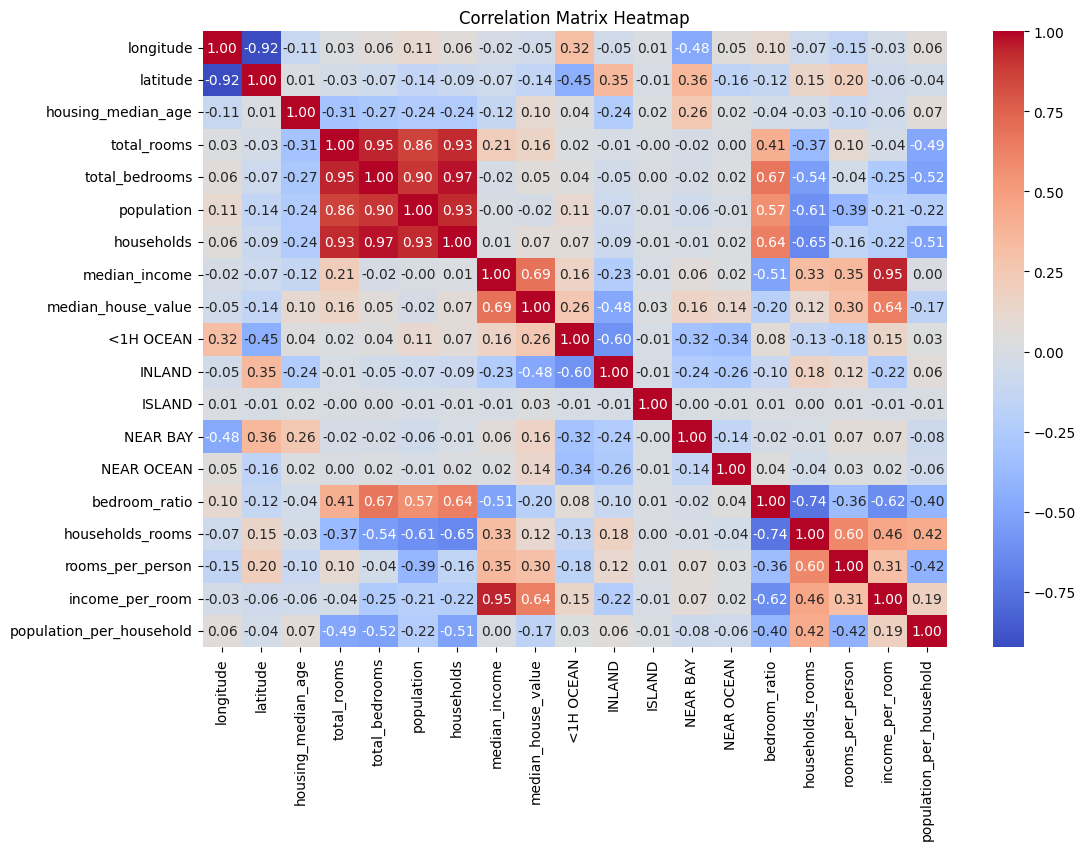

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

### Apply same transformations to test data


In [409]:
test_data = X_test.join(y_test)

for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    test_data[col] = np.log(test_data[col] + 1)

In [410]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop('ocean_proximity', axis=1)

In [411]:
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']
test_data['rooms_per_person'] = test_data['total_rooms'] / test_data['population']
test_data['income_per_room'] = test_data['median_income'] / test_data['total_rooms']
test_data['population_per_household'] = test_data['population'] / test_data['households']

In [412]:
from sklearn.preprocessing import StandardScaler

X_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']
X_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [413]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_rooms,rooms_per_person,income_per_room,population_per_household
14416,-117.24,32.79,20.0,6.869014,5.631212,6.265301,5.541264,3.1838,245800.0,0,0,0,0,1,0.819799,1.239612,1.096358,0.463502,1.130663
16383,-121.29,38.01,2.0,8.764678,7.018402,8.110127,6.864848,4.4871,137900.0,0,1,0,0,0,0.800760,1.276748,1.080708,0.511953,1.181399
7731,-118.14,33.92,31.0,8.224700,6.749931,7.746733,6.687109,3.2237,218200.0,1,0,0,0,0,0.820690,1.229934,1.061699,0.391954,1.158458
1410,-122.07,37.94,30.0,7.139660,5.624018,6.562444,5.402677,2.8920,220800.0,0,0,0,1,0,0.787715,1.321504,1.087958,0.405061,1.214665
1335,-121.89,37.99,4.0,7.683404,6.393591,6.834109,6.135565,4.1016,170500.0,0,1,0,0,0,0.832130,1.252273,1.124273,0.533826,1.113852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,7.978311,6.666957,7.076654,6.620073,3.5985,500001.0,0,0,0,0,1,0.835635,1.205170,1.127413,0.451035,1.068969
6274,-117.95,34.03,33.0,7.486053,5.978886,7.325149,5.932245,3.3389,157900.0,1,0,0,0,0,0.798670,1.261926,1.021966,0.446016,1.234802
2997,-119.03,35.32,12.0,7.909122,6.309918,7.166266,6.261492,2.5575,100200.0,0,1,0,0,0,0.797803,1.263137,1.103660,0.323361,1.144498
13440,-117.42,34.08,28.0,7.741099,6.040255,7.180070,6.098074,3.4844,127700.0,0,1,0,0,0,0.780284,1.269433,1.078137,0.450117,1.177432


## Modeling and Evaluation
- Train and evaluate multiple regression models:
  1. Linear Regression
  2. Random Forest Regressor
  3. Gradient Boosting Regressor
  4. XGBoost Regressor
  5. LightGBM Regressor
  6. CatBoost Regressor
- Metrics used:
  - **RMSE:** Root Mean Squared Error (lower is better)  
  - **MAE:** Mean Absolute Error (lower is better)  
  - **R2 Score:** Coefficient of determination (higher is better)

- Plot residuals, feature importances, and learning curves for better understanding.

###  1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train_s, y_train)

y_pred_lin = lin_reg.predict(X_test_s)

print("Linear Regression Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("MAE:", mean_absolute_error(y_test, y_pred_lin))
print("R2:", r2_score(y_test, y_pred_lin))

Linear Regression Metrics:
RMSE: 65984.68596206116
MAE: 47993.90857547439
R2: 0.6816145358784782


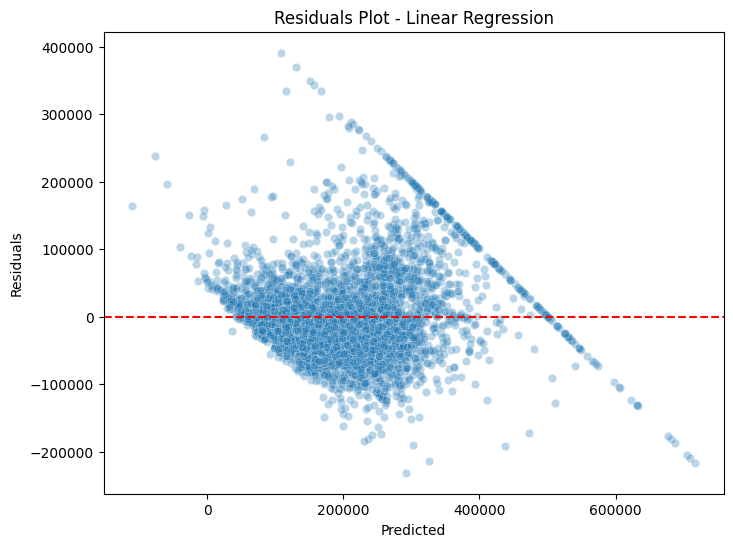

In [415]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_lin, y=y_test-y_pred_lin, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals Plot - Linear Regression")
plt.show()

### 2. Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_s, y_train)

y_pred_rf = rf.predict(X_test_s)

In [417]:
print("\nRandom Forest Metrics (Default):")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))


Random Forest Metrics (Default):
RMSE: 50582.09224295955
MAE: 32782.31159530218
R2: 0.8129057234632336


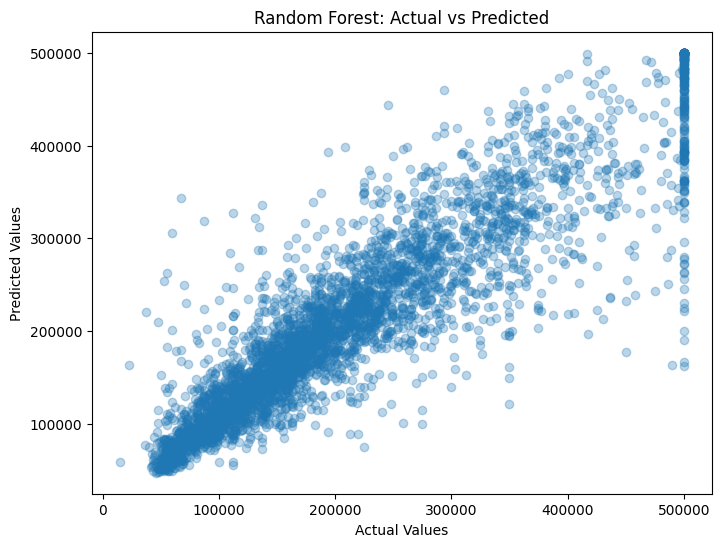

In [418]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

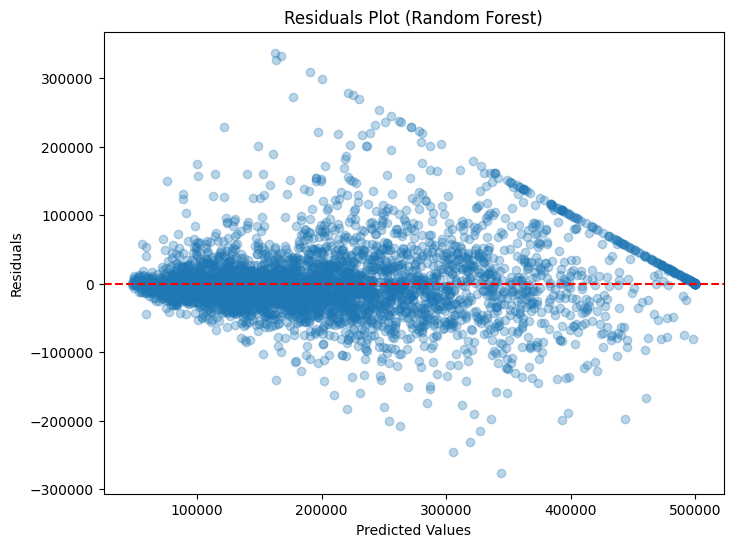

In [419]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(8,6))
plt.scatter(y_pred_rf, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Random Forest)")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_features': [4, 6, 8],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True,
                           n_jobs=-1)

grid_search.fit(X_train_s, y_train)
best_rf = grid_search.best_estimator_
y_pred_rf_best = best_rf.predict(X_test_s)

In [ ]:
print("Random Forest Metrics (Best GridSearchCV):")
print("Best Params:", grid_search.best_params_)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_best)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf_best))
print("R2:", r2_score(y_test, y_pred_rf_best))


Random Forest Metrics (Best GridSearchCV):
Best Params: {'max_depth': None, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 50770.266126549956
MAE: 33292.42726939075
R2: 0.811511089843114


In [ ]:
from sklearn.model_selection import cross_val_score

rf_model = grid_search.best_estimator_

scores = cross_val_score(rf_model, X_train_s, y_train, cv=5, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

print("Cross-validation RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Std Deviation:", rmse_scores.std())


Cross-validation RMSE scores: [47963.74787005 53312.19407946 49197.724968   50453.45790642
 50416.42907471]
Mean RMSE: 50268.71077972966
Std Deviation: 1776.4350489216015


In [424]:
from scipy import stats

final_mse = mean_squared_error(y_test, y_pred_rf_best)
final_rmse = np.sqrt(final_mse)

confidence = 0.95
squared_errors = (y_pred_rf_best - y_test) ** 2
confidence_interval = np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                                               loc=squared_errors.mean(),
                                               scale=stats.sem(squared_errors)))

print("\nFinal RMSE:", final_rmse)
print("95% Confidence Interval for RMSE:", confidence_interval)


Final RMSE: 50770.266126549956
95% Confidence Interval for RMSE: [48509.51174708 52934.55502015]


### 3. Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_s, y_train)

y_pred_gb = gb.predict(X_test_s)

print("Gradient Boosting Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("R2:", r2_score(y_test, y_pred_gb))

Gradient Boosting Metrics:
RMSE: 53223.06463095114
MAE: 36590.14168649442
R2: 0.7928587085590639


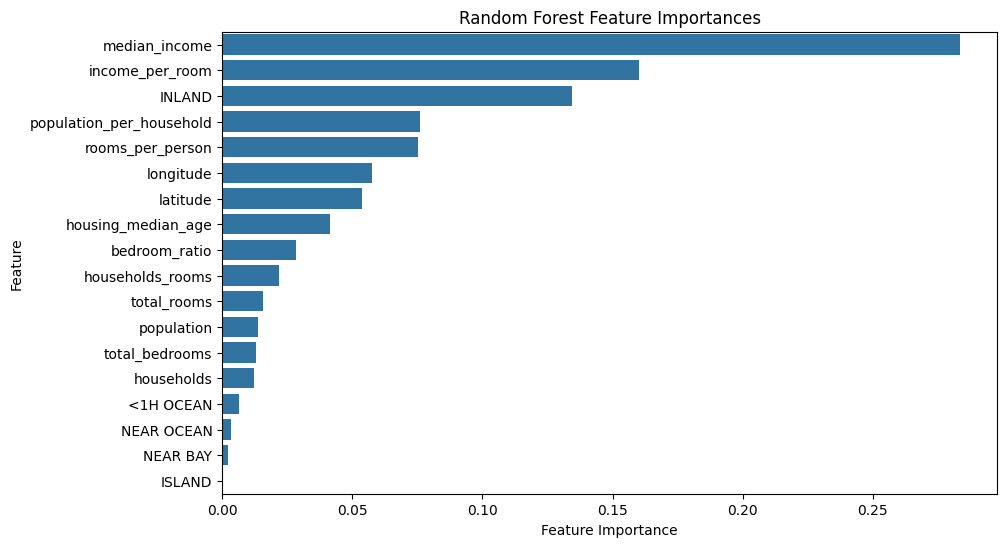

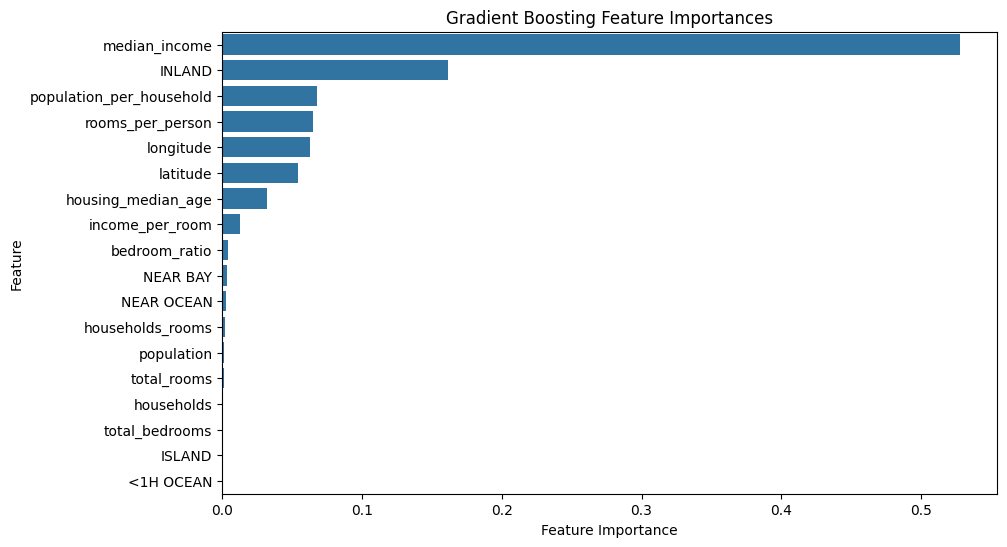

In [427]:
def plot_feature_importances(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10,6))
    plt.title(title)
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.show()

feature_names = X_train.columns  

plot_feature_importances(rf_model, feature_names, "Random Forest Feature Importances")
plot_feature_importances(gb, feature_names, "Gradient Boosting Feature Importances")


### 4. XGBoost with log target


In [430]:
from xgboost import XGBRegressor

y_train_log = np.log1p(y_train)  
y_test_log = np.log1p(y_test)

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [431]:
xgb_model.fit(X_train_s, y_train_log)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [432]:
y_pred_xgb_log = xgb_model.predict(X_test_s)
y_pred_xgb = np.expm1(y_pred_xgb_log)

In [ ]:
print("XGBoost with Log-Transformed Target Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R2:", r2_score(y_test, y_pred_xgb))

XGBoost with Log-Transformed Target Metrics:
RMSE: 46952.196398852546
MAE: 29689.756868194887
R2: 0.8387949101977911


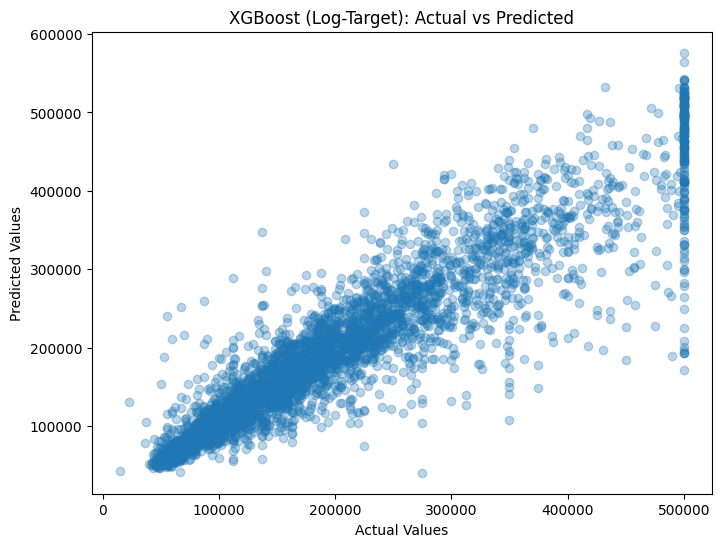

In [434]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost (Log-Target): Actual vs Predicted")
plt.show()

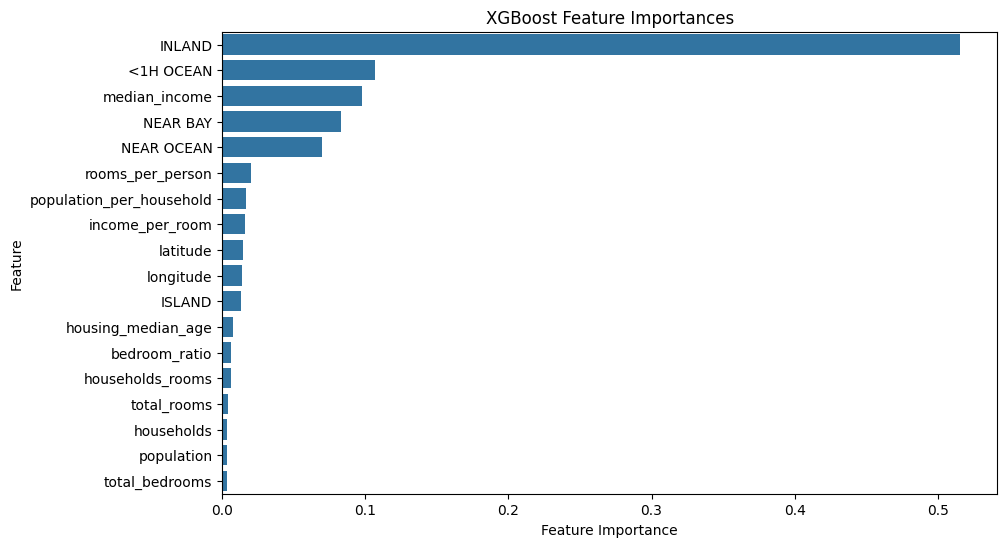

In [435]:
plot_feature_importances(xgb_model, feature_names, "XGBoost Feature Importances")

### 5. LightGBM


In [457]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)
lgbm.fit(X_train_s, y_train)
y_pred_lgbm = lgbm.predict(X_test_s)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3125
[LightGBM] [Info] Number of data points in the train set: 16346, number of used features: 17
[LightGBM] [Info] Start training from score 206644.400098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print("LightGBM (Log-Target) Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))
print("MAE:", mean_absolute_error(y_test, y_pred_lgbm))
print("R2:", r2_score(y_test, y_pred_lgbm))

LightGBM (Log-Target) Metrics:
RMSE: 46343.75687889124
MAE: 30351.36749176502
R2: 0.8429458567859747


### 6. CatBoost


In [450]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_state=42
)
cat.fit(X_train_s, y_train)
y_pred_cat = cat.predict(X_test_s)

In [451]:
print("CatBoostRegressor Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_cat)))
print("MAE:", mean_absolute_error(y_test, y_pred_cat))
print("R2:", r2_score(y_test, y_pred_cat))

CatBoostRegressor Metrics:
RMSE: 47730.33935430113
MAE: 31769.96935455409
R2: 0.8334072996533302


### Metrics calculation


In [453]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "XGBoost" , "LGBMRegressor", "CatBoostRegressor"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lin)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_gb)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        np.sqrt(mean_squared_error(y_test, y_pred_lgbm)),
        np.sqrt(mean_squared_error(y_test, y_pred_cat))
        
        
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lin),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_gb),
        mean_absolute_error(y_test, y_pred_xgb),
        mean_absolute_error(y_test, y_pred_lgbm),
        mean_absolute_error(y_test, y_pred_cat)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lin),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gb),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_lgbm),
        r2_score(y_test, y_pred_cat)
    ]
})

print("Model Comparison Table:")
display(results)

Model Comparison Table:


,Model,RMSE,MAE,R2 Score
0,Linear Regression,65984.685962,47993.908575,0.681615
1,Random Forest,50582.092243,32782.311595,0.812906
2,Gradient Boosting,53223.064631,36590.141686,0.792859
3,XGBoost,46952.196399,29689.756868,0.838795
4,LGBMRegressor,46343.756879,30351.367492,0.842946
5,CatBoostRegressor,47730.339354,31769.969355,0.833407


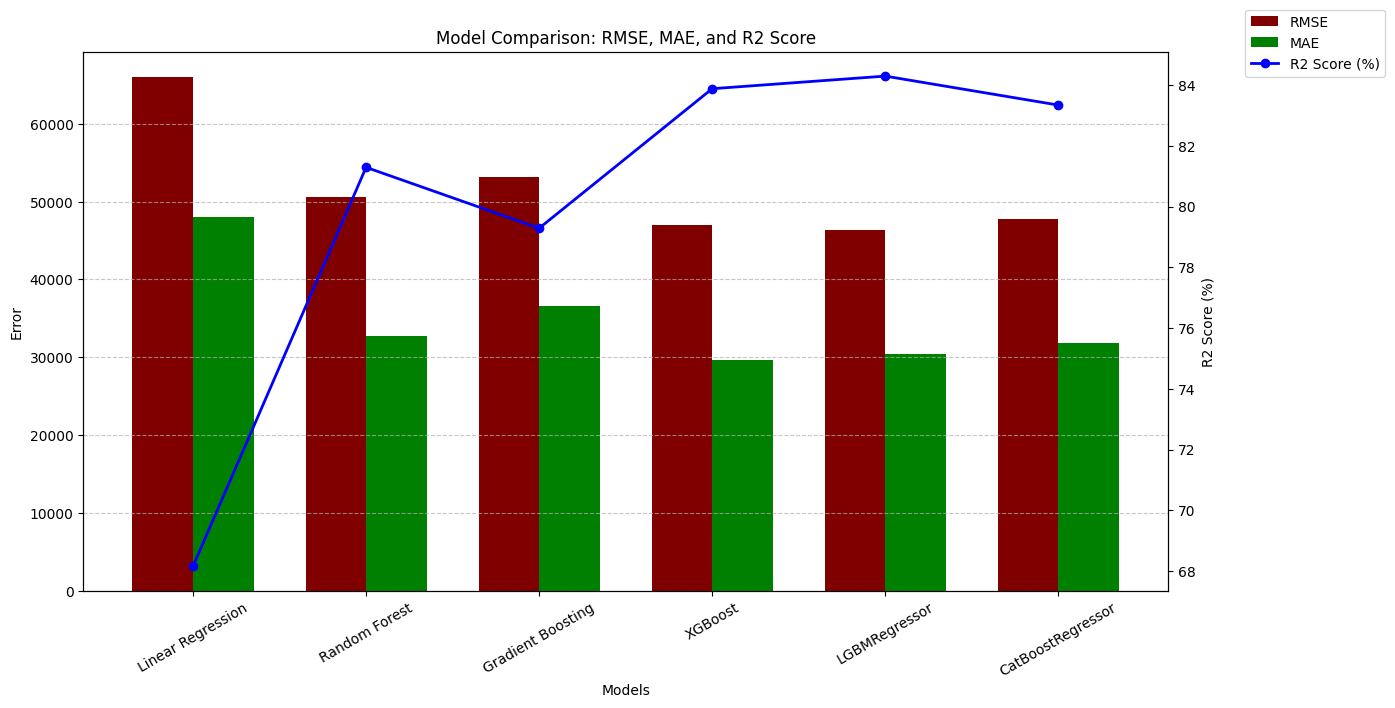

In [454]:
models = results['Model']
rmse = results['RMSE']
mae = results['MAE']
r2 = results['R2 Score']

x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(14,7))

ax1.bar(x - width/2, rmse, width, label='RMSE', color= 'maroon')
ax1.bar(x + width/2, mae, width, label='MAE', color='green')
ax1.set_xlabel('Models')
ax1.set_ylabel('Error')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=30)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
ax2.plot(x, r2*100, 'o-', color='blue', label='R2 Score (%)', linewidth=2)
ax2.set_ylabel('R2 Score (%)')

fig.legend(loc="upper left", bbox_to_anchor=(0.95,0.95))
plt.title('Model Comparison: RMSE, MAE, and R2 Score')
plt.show()


## Model Comparison Summary

| Model                  | RMSE       | MAE        | R2 Score | Remarks                   |
|------------------------|-----------|-----------|----------|---------------------------|
| Linear Regression      | 65984.69  | 47993.91  | 0.682    | Performs worst, linear assumptions fail |
| Random Forest          | 50582.09  | 32782.31  | 0.813    | Good performance, captures non-linear relationships |
| Gradient Boosting      | 53223.06  | 36590.14  | 0.793    | Strong model, slightly worse than RF |
| XGBoost                | 46952.20  | 29689.76  | 0.839    | Excellent, best balance of accuracy and generalization |
| LGBMRegressor          | 46343.76  | 30351.37  | 0.843    | Best overall performance, very stable |
| CatBoostRegressor      | 47730.34  | 31769.97  | 0.833    | Very good, slightly lower than XGBoost/LGBM |

**Conclusion:**  
- **LGBMRegressor** gives the **best overall performance** in terms of RMSE and R2 Score.  
- **XGBoost** is also excellent and very close.  
- **Linear Regression** performs the worst due to inability to capture non-linear relationships.  
- Tree-based ensemble methods (Random Forest, Gradient Boosting, XGBoost, LGBM, CatBoost) are clearly **the best choice** for predicting California housing prices.
